In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
blog_df = pd.read_csv('blogtext.csv',nrows=15000)

In [3]:
blog_df.shape

(15000, 7)

In [4]:
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
7840,883178,male,36,Fashion,Aries,"28,June,2004","Of course it was great, because it ..."
9533,4201848,male,45,HumanResources,Aquarius,"20,August,2004","OK, sorry for abandoning all of you out..."
5215,1103575,female,17,indUnk,Scorpio,"04,February,2004",all I want is to be happy {I've said th...
2870,589736,male,35,Technology,Aries,"05,August,2004",benji can you hear me? benji can y...
9243,2581876,female,24,indUnk,Sagittarius,"01,August,2004",Because I could not stop for ...


In [5]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
blog_df.tail()

,id,gender,age,topic,sign,date,text
14995,727002,male,23,Internet,Leo,"09,May,2004","well, trying to get Blogger's new..."
14996,727002,male,23,Internet,Leo,"09,May,2004",jeebus! gas prices jumped a dime ...
14997,727002,male,23,Internet,Leo,"09,May,2004",*yawn* it's been more than 48 hou...
14998,727002,male,23,Internet,Leo,"08,May,2004",talked to mr. translator the othe...
14999,727002,male,23,Internet,Leo,"08,May,2004",so it scored a wound or two... it...


In [7]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15000 non-null  int64 
 1   gender  15000 non-null  object
 2   age     15000 non-null  int64 
 3   topic   15000 non-null  object
 4   sign    15000 non-null  object
 5   date    15000 non-null  object
 6   text    15000 non-null  object
dtypes: int64(2), object(5)
memory usage: 820.4+ KB


In [8]:
blog_df.gender.value_counts()

male      8550
female    6450
Name: gender, dtype: int64

In [9]:
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

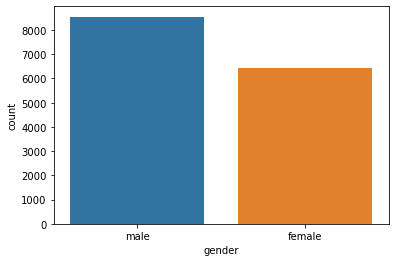

In [10]:
sns.countplot(x='gender',data=blog_df)
plt.show()

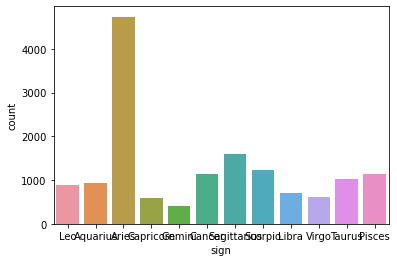

In [11]:
sns.countplot(x='sign',data=blog_df)
plt.show()

# 2 Preprocess rows of the “text” column
a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [12]:
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [13]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [14]:
#convert text to lower
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [15]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [16]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [17]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [18]:
#remove stopwords
stopwords=set(stopwords.words('english'))

In [19]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [20]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [21]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [22]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [23]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [24]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [25]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [26]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# 4. Separate features and labels, and split the data into training and testing¶

In [27]:
X= blog_df.text
y = blog_df.labels

In [28]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [29]:
print(X_train.shape)
print(y_train.shape)

(12000,)
(12000,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(3000,)
(3000,)


In [31]:
X_test

7592     fly five im swamped work duf dont hate djs fer...
3551                                      hate animaljello
9698     also birthday 26 today hoorah spend birthday w...
3759     hehe miss stephanie salibai havent seen awhile...
2353     kinda interesting ht urllink tpwwwdefenselinkm...
                               ...                        
8859     leave ottawa couple daysand youve started figh...
2886                    red nifty pair shoes walk red walk
14357    seriously love song much love hear song comple...
9430     hey well didnt practice today made happy cuz g...
11870    emailalertnoemailadgrantindianaeduurlhttpclose...
Name: text, Length: 3000, dtype: object

# 5. Vectorize the features¶
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [32]:
cvect = CountVectorizer(ngram_range=(1,2))

In [33]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

846147

In [34]:
cvect.get_feature_names()

['00',
 '00 one',
 '000',
 '000 calories',
 '000 people',
 '000 rupees',
 '000 songs',
 '0000001',
 '0000001 zbaras',
 '000001',
 '000001 maybe',
 '002',
 '002 first',
 '002 like',
 '007',
 '007 dun',
 '007 game',
 '007 jersey',
 '007 undocumentables',
 '00734',
 '00734 wait',
 '00s',
 '00s rest',
 '01',
 '01 101102',
 '01 2003',
 '01 bette',
 '01 informs',
 '01 known',
 '01 means',
 '01 minds',
 '01 role',
 '01 triggered',
 '0100',
 '0100 wokeup',
 '0100010001101111011100100110101101111000',
 '011',
 '011 uich',
 '0117',
 '0117 4452271145527',
 '011785',
 '011785 45227',
 '01234',
 '01234 time',
 '013',
 '013 give',
 '02',
 '02 2002',
 '02 2004',
 '02 added',
 '02 argue',
 '02 britney',
 '02 dj',
 '02 faced',
 '02 hope',
 '02 lott',
 '02 personal',
 '02 pet',
 '02 republicans',
 '02 right',
 '02 statement',
 '02 weve',
 '020031',
 '020031 pm',
 '021',
 '021 totally',
 '02182004',
 '02182004 urllink',
 '02232004',
 '025',
 '025 050',
 '026',
 '026 main',
 '026119',
 '026119 63',
 '03',

In [35]:
X_train_ct = cvect.transform(X_train)

In [36]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [37]:
X_train_ct

<12000x846147 sparse matrix of type '<class 'numpy.int64'>'
	with 1903576 stored elements in Compressed Sparse Row format>

In [38]:
X_train_ct[0]

<1x846147 sparse matrix of type '<class 'numpy.int64'>'
	with 366 stored elements in Compressed Sparse Row format>

In [39]:
X_test_ct = cvect.transform(X_test)

In [40]:
X_test_ct

<3000x846147 sparse matrix of type '<class 'numpy.int64'>'
	with 299701 stored elements in Compressed Sparse Row format>

In [41]:
cvect.get_feature_names()[:10]

['00',
 '00 one',
 '000',
 '000 calories',
 '000 people',
 '000 rupees',
 '000 songs',
 '0000001',
 '0000001 zbaras',
 '000001']

In [42]:
print(X_train_ct)

  (0, 15316)	1
  (0, 15339)	1
  (0, 15342)	1
  (0, 15358)	1
  (0, 19048)	1
  (0, 19141)	1
  (0, 26746)	1
  (0, 26770)	1
  (0, 45386)	1
  (0, 45424)	1
  (0, 46148)	1
  (0, 46168)	1
  (0, 47841)	1
  (0, 47882)	1
  (0, 54423)	2
  (0, 54446)	1
  (0, 54450)	1
  (0, 60778)	1
  (0, 60785)	1
  (0, 71169)	1
  (0, 71389)	1
  (0, 73029)	1
  (0, 73224)	1
  (0, 79792)	2
  (0, 80231)	1
  :	:
  (11999, 678053)	1
  (11999, 684976)	1
  (11999, 684982)	1
  (11999, 694613)	1
  (11999, 695279)	1
  (11999, 734208)	1
  (11999, 734586)	1
  (11999, 735393)	1
  (11999, 736327)	1
  (11999, 737946)	1
  (11999, 738001)	1
  (11999, 747029)	1
  (11999, 747412)	1
  (11999, 749277)	1
  (11999, 749749)	1
  (11999, 751713)	1
  (11999, 751963)	1
  (11999, 764840)	1
  (11999, 765128)	1
  (11999, 777575)	1
  (11999, 777742)	1
  (11999, 783979)	1
  (11999, 784269)	1
  (11999, 817752)	1
  (11999, 817944)	1


In [43]:
print(X_test_ct)

  (0, 36822)	2
  (0, 36826)	1
  (0, 36842)	1
  (0, 45560)	1
  (0, 45609)	1
  (0, 61893)	2
  (0, 62292)	1
  (0, 68814)	1
  (0, 74378)	1
  (0, 74465)	1
  (0, 80846)	1
  (0, 90138)	1
  (0, 90142)	1
  (0, 101266)	1
  (0, 108698)	1
  (0, 113333)	1
  (0, 113510)	1
  (0, 115400)	1
  (0, 115462)	1
  (0, 127167)	1
  (0, 127575)	1
  (0, 128237)	1
  (0, 130235)	1
  (0, 133694)	1
  (0, 148833)	2
  :	:
  (2999, 710150)	1
  (2999, 710227)	1
  (2999, 732657)	1
  (2999, 732688)	1
  (2999, 732993)	2
  (2999, 733192)	1
  (2999, 733929)	1
  (2999, 734208)	1
  (2999, 735393)	2
  (2999, 736755)	1
  (2999, 736924)	1
  (2999, 739761)	1
  (2999, 766879)	1
  (2999, 777052)	1
  (2999, 778607)	1
  (2999, 781128)	1
  (2999, 784832)	1
  (2999, 799834)	1
  (2999, 806471)	1
  (2999, 816045)	1
  (2999, 817424)	1
  (2999, 824055)	1
  (2999, 830149)	1
  (2999, 830273)	1
  (2999, 843436)	1


# 6. Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. ¶

In [44]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [45]:
label_counts

{'male': 8550,
 '15': 1,
 'Student': 1680,
 'Leo': 880,
 '33': 1,
 'InvestmentBanking': 70,
 'Aquarius': 941,
 'female': 6450,
 '14': 1,
 'indUnk': 5511,
 'Aries': 4732,
 '25': 1,
 'Capricorn': 596,
 '17': 1,
 'Gemini': 412,
 '23': 1,
 'Non-Profit': 150,
 'Cancer': 1132,
 'Banking': 61,
 '37': 1,
 'Sagittarius': 1589,
 '26': 1,
 '24': 1,
 'Scorpio': 1232,
 '27': 1,
 'Education': 609,
 '45': 1,
 'Engineering': 330,
 'Libra': 705,
 'Science': 78,
 '34': 1,
 '41': 1,
 'Communications-Media': 99,
 'BusinessServices': 148,
 'Sports-Recreation': 80,
 'Virgo': 615,
 'Taurus': 1019,
 'Arts': 289,
 'Pisces': 1147,
 '44': 1,
 '16': 1,
 'Internet': 652,
 'Museums-Libraries': 66,
 'Accounting': 35,
 '39': 1,
 '35': 1,
 'Technology': 2802,
 '36': 1,
 'Law': 44,
 '46': 1,
 'Consulting': 57,
 'Automotive': 14,
 '42': 1,
 'Religion': 28,
 '13': 1,
 'Fashion': 1622,
 '38': 1,
 '43': 1,
 'Publishing': 67,
 '40': 1,
 'Marketing': 207,
 'LawEnforcement-Security': 46,
 'HumanResources': 2,
 'Telecommunicat

# 7. Transform the labels¶
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [47]:
y_train = binarizer.fit_transform(y_train)

In [48]:
y_test = binarizer.transform(y_test)

In [49]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [50]:
y_train

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# 8 Choose a classifier¶
In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression . It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

In [51]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [53]:
Ypred=model.predict(X_test_ct)

In [54]:
Ypred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [55]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])

# Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label¶

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    return model 

In [66]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.24
F1 score: Micro 0.5964816582571936
Average precision score: Micro 0.3968972720900056
Average recall score: Micro 0.486




Accuracy score:  0.24
F1 score: Macro 0.23544917643000204
Average recall score: MAcro 0.1779834919624349




Accuracy score:  0.24
F1 score: weighted 0.5737501865366618
Average precision score: weighted 0.49017439600321694
Average recall score: weighted 0.486






**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.21833333333333332
F1 score: Micro 0.5700367127929963
Average precision score: Micro 0.37396251010668535
Average recall score: Micro 0.44855555555555554




Accuracy score:  0.21833333333333332
F1 score: Macro 0.23413588277595945
Average recall score: MAcro 0.1701714293107405




Accuracy score: 

# 9. Fit the classifier, make predictions and get the accuracy¶
a. Print the following i. Accuracy score ii. F1 score iii. Average precision score iv. Average recall score v. Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    

In [57]:
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    

In [58]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.20233333333333334
F1 score: Micro 0.5697056712132089
Average precision score: Micro 0.37848183933440627
Average recall score: Micro 0.4408888888888889


In [59]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.20233333333333334
F1 score: Macro 0.14509443102349137
Average recall score: MAcro 0.10424020831696158


In [60]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.20233333333333334
F1 score: weighted 0.5281580977629943
Average precision score: weighted 0.47176639482746696
Average recall score: weighted 0.4408888888888889


# Micro-average method,
Micro-average will aggregate the contributions of all classes to compute the average metric.

# Macro-average Method¶
A macro-average will compute the metric independently for each class and then take the average hence treating all classes equally

# Weighted-average Method
Weighted average ensembles allow the contribution of each ensemble member to a prediction to be weighted proportionally to the trust or performance of the member on a holdout dataset.

# 10.Print true label and predicted label for any five examples

In [92]:
import random
j=[]
for i in range(7):
    j.append(random.randint(700,len(Ypred)))
print(j)

for k in j:    
    print('Actual value :',binarizer.inverse_transform(y_test)[k])
    print('Predicted value :',binarizer.inverse_transform(Ypred)[k])
    

[1917, 1533, 1731, 2447, 721, 2545, 2817]
Actual value : ('Pisces', 'indUnk', 'male')
Predicted value : ('male',)
Actual value : ('Sagittarius', 'female', 'indUnk')
Predicted value : ('female',)
Actual value : ('Aries', 'Technology', 'male')
Predicted value : ('male',)
Actual value : ('Education', 'Pisces', 'male')
Predicted value : ('male',)
Actual value : ('Aries', 'Technology', 'male')
Predicted value : ('Aries', 'Technology', 'male')
Actual value : ('Pisces', 'indUnk', 'male')
Predicted value : ('male',)
Actual value : ('Aries', 'Technology', 'male')
Predicted value : ('male',)
